In [16]:
import requests
import datetime as dt
import pandas
import warnings
import japanize_matplotlib
warnings.simplefilter('ignore')

In [46]:

dt_now=dt.datetime.now()
file_day=dt_now - dt.timedelta(days=1)
file_day=file_day.strftime("%Y%m%d")
#ファイルのダウンロード
try:
  url='https://www.pref.tochigi.lg.jp/e04/welfare/hoken-eisei/kansen/hp/documents/'+str(file_day)+'hasseijoukyou.xlsx'
  urlData = requests.get(url).content
  filename=str(file_day)+'hasseijoukyou.xlsx'
  print('0')
  if urlData.decode().startswith('<?xml'):
    print('1')
    file_day=dt_now - dt.timedelta(days=2)
    file_day=file_day.strftime("%Y%m%d")
    url='https://www.pref.tochigi.lg.jp/e04/welfare/hoken-eisei/kansen/hp/documents/'+str(file_day)+'hasseijoukyou.xlsx'
    urlData = requests.get(url).content
    filename=str(file_day)+'hasseijoukyou.xlsx'
    if urlData.decode().startswith('<?xml'):
      print('2')
      file_day=dt_now - dt.timedelta(days=1)
      file_day=file_day.strftime("%Y%m%d")
      url='https://www.pref.tochigi.lg.jp/e04/welfare/hoken-eisei/kansen/hp/documents/'+str(file_day)+'hasseijkyou_1.xlsx'
      urlData = requests.get(url).content
      filename=str(file_day)+'hasseijkyou_1.xlsx'
    else:
      file_day=dt_now - dt.timedelta(days=2)
      file_day=file_day.strftime("%Y%m%d")
      url='https://www.pref.tochigi.lg.jp/e04/welfare/hoken-eisei/kansen/hp/documents/'+str(file_day)+'hasseijkyou_1.xlsx'
      urlData = requests.get(url).content
      filename=str(file_day)+'hasseijkyou_1.xlsx'
  else:
    print('終了')
except:
  file_day=dt_now - dt.timedelta(days=2)
  file_day=file_day.strftime("%Y%m%d")
  try:
    urlData = requests.get(url).content
  except:
    print('ファイルが存在しません')
  url='https://www.pref.tochigi.lg.jp/e04/welfare/hoken-eisei/kansen/hp/documents/'+str(file_day)+'hasseijkyou.xlsx'
  filename=str(file_day)+'hasseijkyou.xlsx'
with open('data/'+str(filename) ,mode='wb') as f: # wb でバイト型を書き込める
  f.write(urlData)
print(filename)

https://www.pref.tochigi.lg.jp/e04/welfare/hoken-eisei/kansen/hp/documents/20210822hasseijoukyou.xlsx
20210821hasseijkyou.xlsx


In [18]:
#本来はExcelデータを入力するようにする.
print(str(filename))
corona=pandas.read_excel('data/'+str(filename), header=1)
corona=corona[['番号','年代','性別','居住地','発症日','判明日','その他（＊）']]
corona=corona[corona['番号']!='※居住地にかかわらず、感染症の予防及び感染症の患者に対する医療に関する法律に基づき、栃木県及び宇都宮市に届け出のあった患者について掲載しています。（他県や検疫所に届け出があった患者は、他県等で公表されます。）\n※患者・御家族の人権尊重・個人情報保護に御理解と御配慮をお願いします。\n※退院日等の「退院」には、感染症法上の入院勧告等の解除及び県外保健所への入院等の対応依頼を含みます。\n(＊) 陽性者との接触の有無、感染に関与すると考えられる行動歴等  ']
corona=corona[corona['判明日']!='調査中']
corona=corona[corona['判明日']!='現在調査中']
corona=corona.reset_index()
for i in range(len(corona)):
    if type(corona['判明日'][i]) is int:
        corona['判明日'][i]=pandas.to_datetime('1900/1/1') + pandas.to_timedelta(corona['判明日'][i] - 1, unit='days')
#データの整形
corona=corona.dropna(how='all')
corona = corona.dropna(axis=0, subset=['番号'])
corona[corona['番号'].isnull()]
corona=corona[corona['番号']!=' ']
corona=corona.reset_index()
#当面の最終的な目標は, 2020年のデータと2021年のデータの区別ができるようにする.(暫定方法)
corona['Year']=0
corona['Month']=0
corona['判明日']=pandas.to_datetime(corona['判明日'], format='%Y-%m-%d %H:%M:%S')
corona['Year']=corona['判明日'].dt.year
corona['Month']=corona['判明日'].dt.month

20210821hasseijkyou.xlsx


<h1>全体データ</h1>

In [19]:
corona

,level_0,index,番号,年代,性別,居住地,発症日,判明日,その他（＊）,Year,Month
0,0,0,11755,10代,男性,下野市,調査中,2021-08-22,※宇都宮市4256例目,2021,8
1,1,1,11754,40代,男性,宇都宮市,調査中,2021-08-22,※宇都宮市4255例目,2021,8
2,2,2,11753,40代,男性,宇都宮市,調査中,2021-08-22,※宇都宮市4254例目,2021,8
3,3,3,11752,20代,男性,宇都宮市,調査中,2021-08-22,※宇都宮市4253例目,2021,8
4,4,4,11751,40代,女性,宇都宮市,調査中,2021-08-22,11755･11756例目の家族\n※宇都宮市4252例目,2021,8
...,...,...,...,...,...,...,...,...,...,...,...
11742,11749,11758,5,40代,男性,フィリピン,NaN,2020-03-25,フィリピンから帰国,2020,3
11743,11750,11759,4,50代,男性,県南,NaN,2020-03-21,ポルトガル旅行,2020,3
11744,11751,11760,3,40代,女性,宇都宮,NaN,2020-03-19,タイ旅行 \n※宇都宮市1例目,2020,3
11745,11752,11761,2,30代,女性,県南,NaN,2020-03-06,大阪ライブハウス、ショッピングセンター勤務,2020,3


<h2>最新データ</h2>

In [20]:
corona_s=corona[corona['判明日']==corona['判明日'][0]]
print(str(corona['判明日'][0])+'のデータの件数')
print(str(len(corona_s))+'件')

2021-08-22 00:00:00のデータの件数
39件


In [21]:
corona_s

,level_0,index,番号,年代,性別,居住地,発症日,判明日,その他（＊）,Year,Month
0,0,0,11755,10代,男性,下野市,調査中,2021-08-22,※宇都宮市4256例目,2021,8
1,1,1,11754,40代,男性,宇都宮市,調査中,2021-08-22,※宇都宮市4255例目,2021,8
2,2,2,11753,40代,男性,宇都宮市,調査中,2021-08-22,※宇都宮市4254例目,2021,8
3,3,3,11752,20代,男性,宇都宮市,調査中,2021-08-22,※宇都宮市4253例目,2021,8
4,4,4,11751,40代,女性,宇都宮市,調査中,2021-08-22,11755･11756例目の家族\n※宇都宮市4252例目,2021,8
5,5,5,11750,20代,女性,宇都宮市,調査中,2021-08-22,11755･11757例目の家族\n※宇都宮市4251例目,2021,8
6,6,6,11749,10歳未満,女性,宇都宮市,調査中,2021-08-22,11756･11757例目の家族\n※宇都宮市4250例目,2021,8
7,7,7,11748,30代,女性,宇都宮市,調査中,2021-08-22,※宇都宮市4249例目,2021,8
8,8,8,11747,20代,男性,宇都宮市,調査中,2021-08-22,※宇都宮市4248例目,2021,8
9,9,9,11746,50代,女性,上三川町,調査中,2021-08-22,※宇都宮市4247例目,2021,8


<h2>居住地についての可視化</h2>
<pre>
多い順に10件に絞って可視化する.
</pre>

array([<AxesSubplot:ylabel='番号'>], dtype=object)

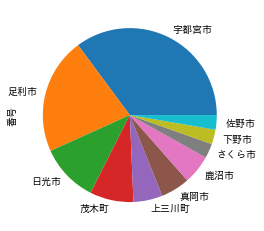

In [22]:
corona_place=corona_s.groupby('居住地').count().sort_values('番号',ascending=False)['番号'][0:10]
corona_place.plot.pie(subplots=True)

In [23]:
corona_place

居住地
宇都宮市    13
足利市      8
日光市      4
茂木町      3
上三川町     2
真岡市      2
鹿沼市      2
さくら市     1
下野市      1
佐野市      1
Name: 番号, dtype: int64

<h2>年齢についての可視化</h2>

array([<AxesSubplot:ylabel='番号'>], dtype=object)

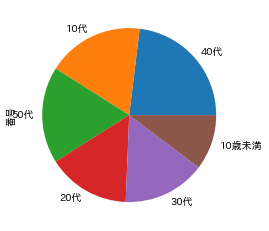

In [24]:
corona_nen=corona_s.groupby('年代').count().sort_values('番号',ascending=False)['番号'][0:10]
corona_nen.plot.pie(subplots=True)

In [25]:
corona_nen

年代
40代      9
10代      7
50代      7
20代      6
30代      6
10歳未満    4
Name: 番号, dtype: int64

<h2>性別についての可視化</h2>

array([<AxesSubplot:ylabel='番号'>], dtype=object)

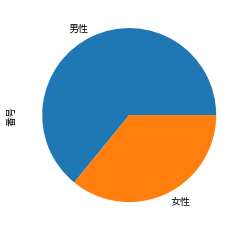

In [26]:
corona_sei=corona_s.groupby('性別').count().sort_values('番号',ascending=False)['番号'][0:10]
corona_sei.plot.pie(subplots=True)

<h2>月別コロナ数推移</h2>
<pre>
現状, 発症日をベースにすると調査中のデータが多い為判明日をベースにカウントする.
※発症数をcountで取る.
</pre>

<AxesSubplot:xlabel='判明日'>

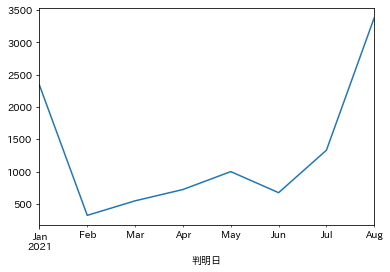

In [27]:
#2021年のデータを対象とする.
corona=corona[corona['Year']==2021]
corona.groupby(pandas.Grouper(key='判明日', freq='M')).count()['Year'].plot()

In [28]:
corona.groupby(pandas.Grouper(key='判明日', freq='M')).count()['番号']

判明日
2021-01-31    2337
2021-02-28     322
2021-03-31     547
2021-04-30     722
2021-05-31     999
2021-06-30     673
2021-07-31    1330
2021-08-31    3381
Freq: M, Name: 番号, dtype: int64

<h2>居住地についての可視化</h2>
<pre>
多い順に10件に絞って可視化する.
</pre>

array([<AxesSubplot:ylabel='番号'>], dtype=object)

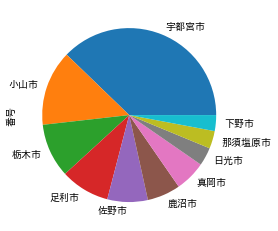

In [29]:
corona_place=corona.groupby('居住地').count().sort_values('番号',ascending=False)['番号'][0:10]
corona_place.plot.pie(subplots=True)

In [30]:
corona_place

居住地
宇都宮市     3272
小山市      1214
栃木市       868
足利市       791
佐野市       651
鹿沼市       535
真岡市       497
日光市       294
那須塩原市     284
下野市       256
Name: 番号, dtype: int64

<h2>年齢についての可視化</h2>

array([<AxesSubplot:ylabel='番号'>], dtype=object)

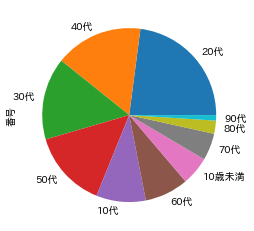

In [31]:
corona_nen=corona.groupby('年代').count().sort_values('番号',ascending=False)['番号'][0:10]
corona_nen.plot.pie(subplots=True)

In [32]:
corona_nen

年代
20代      2360
40代      1678
30代      1572
50代      1477
10代       946
60代       838
10歳未満     547
70代       516
80代       251
90代       105
Name: 番号, dtype: int64

<h2>性別についての可視化</h2>

array([<AxesSubplot:ylabel='番号'>], dtype=object)

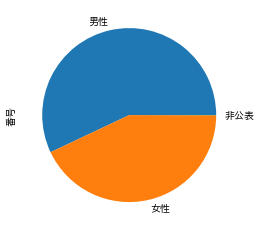

In [33]:
corona_sei=corona.groupby('性別').count().sort_values('番号',ascending=False)['番号'][0:10]
corona_sei.plot.pie(subplots=True)

In [34]:
corona_sei

性別
男性     5880
女性     4427
非公表       4
Name: 番号, dtype: int64

<h2>日別コロナ数推移</h2>
<pre>
現状, 発症日をベースにすると調査中のデータが多い為判明日をベースにカウントする.
※発症数をcountで取る.
</pre>

<AxesSubplot:xlabel='判明日'>

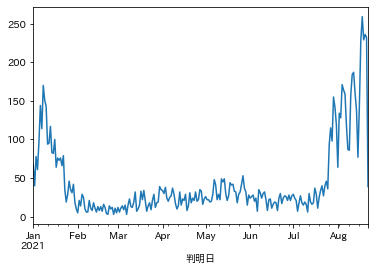

In [35]:
corona.groupby(pandas.Grouper(key='判明日', freq='D')).count()['番号'].plot()

In [36]:
corona.groupby(pandas.Grouper(key='判明日', freq='D')).count()['番号']

判明日
2021-01-01     68
2021-01-02     40
2021-01-03     78
2021-01-04     61
2021-01-05     97
             ... 
2021-08-18    259
2021-08-19    229
2021-08-20    236
2021-08-21    232
2021-08-22     39
Freq: D, Name: 番号, Length: 234, dtype: int64

<h1>今月のデータ</h1>

In [37]:
dt_now = dt.datetime.now()
dt_now.month
corona_toYear=corona[corona['Year']==2021]
corona_toYear=corona_toYear[corona_toYear['Month']==8]

<h2>日別データ(今月)</h2>

<AxesSubplot:xlabel='判明日'>

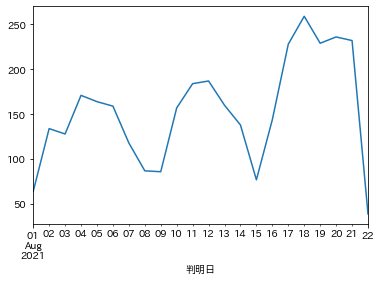

In [38]:
corona_toYear.groupby(pandas.Grouper(key='判明日', freq='D')).count()['発症日'].plot()

<h2>居住地についての可視化(今月)</h2>
<pre>
多い順に10件に絞って可視化する.
</pre>

array([<AxesSubplot:ylabel='番号'>], dtype=object)

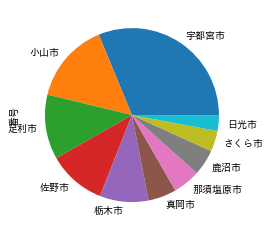

In [39]:
corona_place=corona_toYear.groupby('居住地').count().sort_values('番号',ascending=False)['番号'][0:10]
corona_place.plot.pie(subplots=True)

In [40]:
corona_place

居住地
宇都宮市     863
小山市      414
足利市      332
佐野市      298
栃木市      250
真岡市      145
那須塩原市    140
鹿沼市      133
さくら市     107
日光市       81
Name: 番号, dtype: int64

<h2>年齢についての可視化(今月)</h2>

array([<AxesSubplot:ylabel='番号'>], dtype=object)

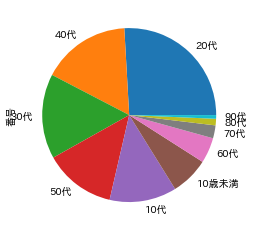

In [41]:
corona_nen=corona_toYear.groupby('年代').count().sort_values('番号',ascending=False)['番号'][0:10]
corona_nen.plot.pie(subplots=True)

In [42]:
corona_nen

年代
20代      874
40代      556
30代      532
50代      447
10代      421
10歳未満    240
60代      160
70代       81
80代       41
90代       23
Name: 番号, dtype: int64

<h2>性別についての可視化(今月)</h2>

array([<AxesSubplot:ylabel='番号'>], dtype=object)

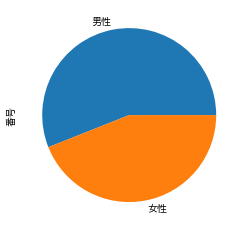

In [43]:
corona_sei=corona_toYear.groupby('性別').count().sort_values('番号',ascending=False)['番号'][0:10]
corona_sei.plot.pie(subplots=True)